In [1]:
%%time
from pcap_processor import processor as proc
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

CPU times: user 2.87 s, sys: 949 ms, total: 3.82 s
Wall time: 5.53 s


In [2]:
%%time
capture = proc("sample.pcap")
stream_table = capture.dataframe()

CPU times: user 13.1 s, sys: 221 ms, total: 13.4 s
Wall time: 13.5 s


In [3]:
%%time
# Find headers
headers = []
source = []
destination = []
for col in stream_table:
    headers.append(col)

print(headers)
print(stream_table)
#print(stream_table['Source'])

['Time', 'Source', 'Destination', 'Bytes']
                 Time          Source     Destination  Bytes
0      20180829204934   172.217.4.110   192.168.1.146     52
1      20180829204934   216.58.216.78   192.168.1.146     52
2      20180829204934   216.58.216.78   192.168.1.146    502
3      20180829204934   192.168.1.146   216.58.216.78     52
4      20180829204934   216.58.216.78   192.168.1.146    509
5      20180829204934   192.168.1.146   216.58.216.78     52
6      20180829204934   216.58.216.78   192.168.1.146     86
7      20180829204934   192.168.1.146   216.58.216.78     52
8      20180829204934   192.168.1.146  35.155.143.197     40
9      20180829204934   192.168.1.146     192.168.1.1     55
10     20180829204934     192.168.1.1   192.168.1.146     71
11     20180829204934   192.168.1.146    13.32.167.89    277
12     20180829204934   192.168.1.146    13.32.167.89     98
13     20180829204934    13.32.167.89   192.168.1.146     52
14     20180829204934    13.32.167.89   19

In [4]:
%%time
# Build lookup tables of Source and Destination IPs
source = stream_table.Source.unique()
destination = stream_table.Destination.unique()

lookup_table_by_ip = list(set(np.append(source, destination)))
lookup_table_by_index = [idx for idx in range(len(lookup_table_by_ip))]

def get_item_with_index(lookup_table):
    """
        Takes a lookup table. Returns a 
        dictionary containg the item with its index.
        
        Inputs:
        @lookup_table: a list of ip addresses
        
        Output:
        @dictionary: a dictionary with item as the key and index from the lookup
            table as a value.
    """
    dictionary = {}
  
    for i,x in enumerate(lookup_table):
        dictionary[x] = i
        
    return dictionary
    


CPU times: user 12.3 ms, sys: 1.68 ms, total: 14 ms
Wall time: 12.6 ms


In [5]:
%%time
# Test filter by source IP
ip = "192.168.1.146"
target_index = lookup_table_by_ip.index(ip)
#target_ip = lookup_table_by_index[].index(target_index)
print(target_index)

103
CPU times: user 775 µs, sys: 609 µs, total: 1.38 ms
Wall time: 917 µs


In [6]:
%%time
# Select only rows with target IP as source
stream_by_source = stream_table.loc[stream_table['Source'] == ip]



print(get_item_with_index(lookup_table_by_ip))

{'209.165.150.32': 0, '52.32.224.35': 1, '172.217.0.14': 2, '52.109.76.32': 3, '17.248.130.169': 4, '66.58.255.59': 5, '192.168.1.255': 6, '172.217.8.206': 7, '192.168.1.161': 8, '192.168.1.192': 9, '192.30.252.154': 10, '34.192.34.151': 11, '18.232.37.4': 12, '23.52.168.128': 13, '172.217.8.161': 14, '192.0.73.2': 15, '172.217.4.69': 16, '104.237.191.1': 17, '216.58.216.99': 18, '17.134.126.34': 19, '162.125.34.6': 20, '192.168.1.1': 21, '172.217.9.74': 22, '23.222.154.141': 23, '17.167.192.128': 24, '239.255.255.250': 25, '209.165.150.33': 26, '173.194.198.108': 27, '17.249.44.24': 28, '17.248.130.179': 29, '54.197.54.176': 30, '17.32.194.34': 31, '17.249.44.85': 32, '52.54.211.148': 33, '172.217.6.110': 34, '74.125.197.105': 35, '209.85.147.108': 36, '172.217.9.35': 37, '35.155.143.197': 38, '54.174.0.98': 39, '224.0.0.252': 40, '224.0.0.251': 41, '172.217.9.46': 42, '74.125.28.99': 43, '172.217.4.238': 44, '74.125.126.109': 45, '192.168.1.145': 46, '108.177.121.188': 47, '17.248.13

In [7]:
%%time
# Select only rows with target IP as source
stream_by_source = stream_table.loc[stream_table['Source'] == ip]
mapping = get_item_with_index(lookup_table_by_ip)

# Replace IP addresses with index from lookup table
#for idx, address in enumerate(lookup_table):
#    print(idx)
#    print(address)
#    #stream_by_source.loc[:,('Source',address)] = idx
    
stream_by_source['Source'] = stream_by_source['Source'].map(mapping)
stream_by_source['Destination'] = stream_by_source['Destination'].map(mapping)
    
print(stream_by_source)

/Users/kyletopasna/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                 Time  Source  Destination  Bytes
3      20180829204934     103           69     52
5      20180829204934     103           69     52
7      20180829204934     103           69     52
8      20180829204934     103           38     40
9      20180829204934     103           21     55
11     20180829204934     103           76    277
12     20180829204934     103           76     98
15     20180829204934     103           76     52
18     20180829204934     103           76     52
19     20180829204934     103           76     52
20     20180829204934     103           23    418
22     20180829204934     103           23     52
23     20180829204934     103           56     51
24     20180829204934     103           23    424
25     20180829204934     103           23    424
28     20180829204934     103           23     52
30     20180829204935     103           23    420
33     20180829204935     103           23     52
34     20180829204935     103           23    425


/Users/kyletopasna/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#stream_by_source.shape
#stream_by_source = stream_by_source.values.tolist()
type(stream_by_source)

In [8]:
print(stream_by_source)

                 Time  Source  Destination  Bytes
3      20180829204934     103           69     52
5      20180829204934     103           69     52
7      20180829204934     103           69     52
8      20180829204934     103           38     40
9      20180829204934     103           21     55
11     20180829204934     103           76    277
12     20180829204934     103           76     98
15     20180829204934     103           76     52
18     20180829204934     103           76     52
19     20180829204934     103           76     52
20     20180829204934     103           23    418
22     20180829204934     103           23     52
23     20180829204934     103           56     51
24     20180829204934     103           23    424
25     20180829204934     103           23    424
28     20180829204934     103           23     52
30     20180829204935     103           23    420
33     20180829204935     103           23     52
34     20180829204935     103           23    425


In [18]:
%%time
import copy

mapping = get_item_with_index(lookup_table_by_ip)

converted_stream_table = copy.copy(stream_table)

converted_stream_table['Source'] = stream_table['Source'].map(mapping)
converted_stream_table['Destination'] = converted_stream_table['Destination'].map(mapping)

bandwidth = estimate_bandwidth(converted_stream_table, quantile=0.2, n_samples=5000)


ms = MeanShift(bandwidth=bandwidth)
ms.fit(converted_stream_table)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2
CPU times: user 58.7 s, sys: 571 ms, total: 59.2 s
Wall time: 58.3 s


In [21]:
converted_stream_table["Cluster"]=(ms.predict(converted_stream_table))

In [22]:
print(converted_stream_table)

                 Time  Source  Destination  Bytes  Cluster
0      20180829204934      66          103     52        1
1      20180829204934      69          103     52        1
2      20180829204934      69          103    502        1
3      20180829204934     103           69     52        1
4      20180829204934      69          103    509        1
5      20180829204934     103           69     52        1
6      20180829204934      69          103     86        1
7      20180829204934     103           69     52        1
8      20180829204934     103           38     40        1
9      20180829204934     103           21     55        1
10     20180829204934      21          103     71        1
11     20180829204934     103           76    277        1
12     20180829204934     103           76     98        1
13     20180829204934      76          103     52        1
14     20180829204934      76          103     98        1
15     20180829204934     103           76     52       

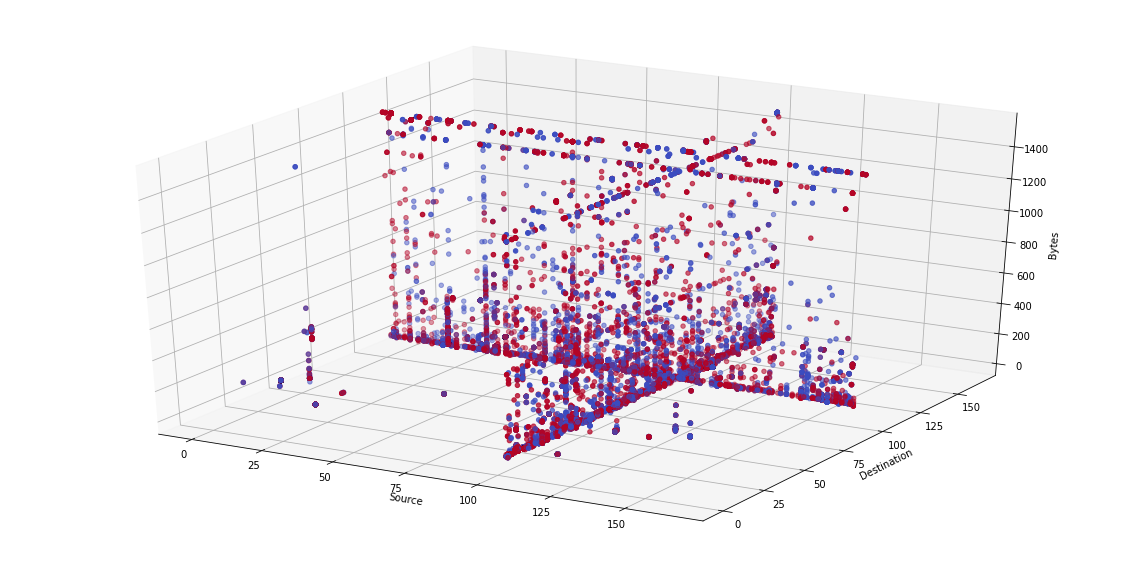

CPU times: user 2.98 s, sys: 64.2 ms, total: 3.05 s
Wall time: 2.79 s


In [34]:
%%time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle


c = converted_stream_table["Cluster"] <= 0
three_d = plt.figure(figsize=(20,10)).gca(projection='3d')
three_d.scatter(converted_stream_table["Source"], converted_stream_table["Destination"], converted_stream_table["Bytes"], c=c, cmap="coolwarm")
three_d.set_xlabel("Source")
three_d.set_ylabel("Destination")
three_d.set_zlabel("Bytes")
plt.show()

In [ ]:
%%time
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

stream_by_source_list = stream_by_source.set_index("Cluster")
stream_by_source_list = stream_by_source.values.flatten()

print(stream_by_source_list)

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    print(stream_by_source_list[my_members, 0])
    cluster_center = cluster_centers[k]
    plt.plot(stream_by_source_list[my_members, 0], stream_by_source_list[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

TODO:
- Fit MS model to source data with only time, destination, and bytes as features. 
- Try and plot that MS model on those three features in 3 dimensions.
- Run MS predict on each row and plot each cluster separately.